# Projeto - Avaliação de Técnicas de Aprendizado de Máquina em um Problema de Classificação

<br> 

### Introdução

<br>

<font size=4.25>

<p style='text-align: justify;'>
Os problemas de classificação em aprendizado de máquina são caracterizados quando um objeto necessita ser classificado em uma classe ou grupo predefinido com base nos atributos desse objeto [1]. Diversos problemas diários pode ser categorizados como problemas de classificação, tais como: previsão do tempo, reconhecimento de manuscritos,controle de qualidade, entre outros. 
<p/>
    
 <p style='text-align: justify;'>
Geralmente os problemas de classificação são divididos em duas categorias: classificação binária e multiclasse. Enquanto um problema binário é um situação na qual o resultados previsto deve ser determinado como um decisão de 'Sim' ou 'Não', um problema multiclasse é uma condição em que o resultado previsto tem como decisão mũltiplas respostas [2]. 
<p/>
    
 <p style='text-align: justify;'>
Embora os problemas de classificação possuam um objetivo simples, uma solução adequada para problemas dessa natureza passa necessariamente pela seleção de técnicas de aprendizado de máquina que melhor se adeque aos dados utilizados. Assim sendo, ao se abordar um problema de classificação é fundamental que mais de uma técnica de aprendizado de máquina seja testada. 
<p/>
    
 <p style='text-align: justify;'>
Diante disso, esse trabalho tem como objetivo a avaliação de algumas técnicas de aprendizado de máquina na classificação de rochas e minas a partir de dados de sinais de sonar (disponível em [3]). Dentre as técnicas de aprendizado de máquina, a seguinte serão analisadas:
<p/>
    
    
<ol>
<li> Redes Neurais (<em>Multilayer Percepton) </li>
<li>Máquinas de Vetor Suporte</li>
<li>K Vizinhos mais próximos</li>
</ol>
    
Salienta-se que as técnicas de rede neurais e k vizinhos mais próximos foram produzidos do zero, somente utilizando bibliotecas mais primitivas tais como numpy e pandas. 


### Descrição dos dados utilizados

<br>

<font size=4.25>

<p style='text-align: justify;'>
O banco de dados utilizado para a avaliação das técnicas de aprendizado de máquina trata-se do mesmo utilizado em [4], que é composto por dados de sinais de sonar para a classificação de minas (cilindros metálicos) e rochas de tamanho equivalente no assoalho marinho. Conforme indica em [4] bem como o diagrama da Figura abaixo, os sinais de sonar obtidos em campo foram filtrados e a informação espectral extraída foi utilizada como dado de entrada nas redes neurais avaliadas pelos autores. Após o processamento, cada amostra utilizada era composta por um total de 60 valores no intervalo entre 0 e 1, sendo cada um deles representativo da energia compreendida pelas bandas de frequência integrado ao longo do tempo. 
<p/>
    
<img src=dado_processado.png>
    
<font size=4.25>

<p style='text-align: justify;'>
Ao todo, o banco de dados possui 206 amostras, sendo 111 de rocha e 97 de mina. Conforme apresenta os histogramas abaixo, os atributos de entrada - energia compreendida pelas bandas de frequência - em alguns casos estão mais associados a uma das classes do que outra. Este é o caso dos atributos 2 e 3, onde os valores mais diminutos de energia estão usualmente relacionados à classe Rocha (em Azul). Por outro lado, quando se observa os atributos 11 e 12, constata-se que os menores valores de energia estão associados à classe Mina (em Laranja).  
<p/>

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
       <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
       <Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
       <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
       <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
       <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>,
       <Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
       <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
       <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
       <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
       <Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
       <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,
       <Axes: ti

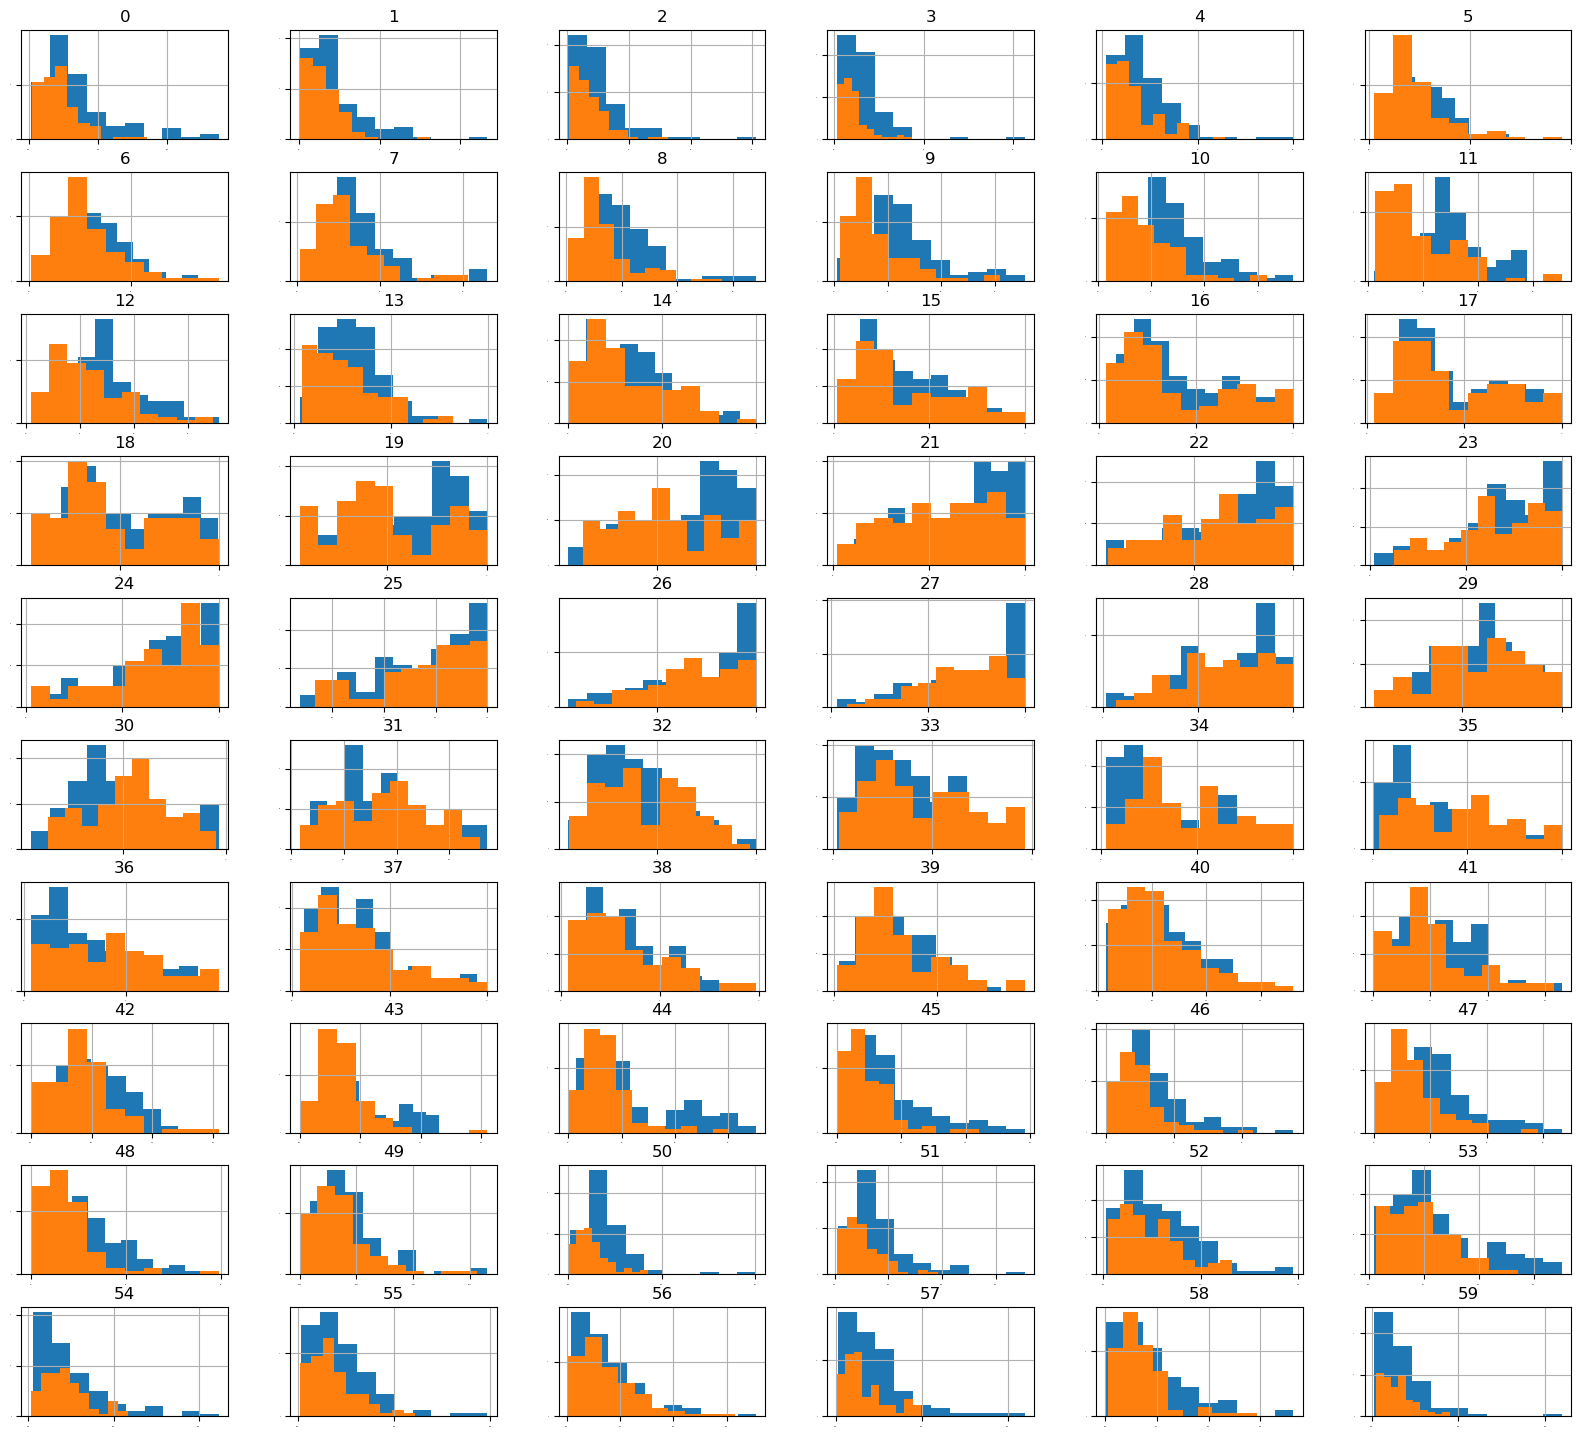

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, f1_score
import warnings

warnings.filterwarnings("ignore")

full_path = os.getcwd()
sonar_data=pd.read_csv(full_path+"/"+"sonar_data.csv", header=None, sep=";")
sonar_data_list = sonar_data.values.tolist()

lista=[]
lista_2=[]

for index in sonar_data.index:
    if sonar_data.iloc[index][60]=="M":
        lista.append(sonar_data.iloc[index])
    elif sonar_data.iloc[index][60]=="R":
        lista_2.append(sonar_data.iloc[index])
    
df_M=pd.DataFrame(lista)
df_R=pd.DataFrame(lista_2)

length = 60
axes=df_M.hist(layout=(10,6), xlabelsize=1, ylabelsize=1, figsize=(20,18))
df_R.hist(ax=axes.ravel()[:length],layout=(8,8), xlabelsize=1, ylabelsize=1, figsize=(20,18))

### Tratamento dos dados de entrada ----------- REESCREVER

<br>

<font size=4.25>

<p style='text-align: justify;'>
O banco de dados utilizado para a avaliação das técnicas de aprendizado de máquina trata-se do mesmo utilizado em [4], que é composto por dados de sinais de sonar para a classificação de minas (cilindros metálicos) e rochas de tamanho equivalente no assoalho marinho. Conforme indica em [4] bem como o diagrama da Figura abaixo, os sinais de sonar obtidos em campo foram filtrados e a informação espectral extraída foi utilizada como dado de entrada nas redes neurais avaliadas pelos autores. Após o processamento, cada amostra utilizada era composta por um total de 60 valores no intervalo entre 0 e 1, sendo cada um deles representativo da energia compreendida pelas bandas de frequência integrado ao longo do tempo. 
<p/>

In [2]:
sonar_data_features = sonar_data[sonar_data.columns[sonar_data.columns[0]:len(sonar_data.columns)-1]].values.tolist()

sonar_data_target = sonar_data[len(sonar_data.columns)-1].apply(lambda x: 1 if x=='R' else 0).values.tolist()

validation_size = 0.25

seed = 7

X_train, X_teste, Y_train, Y_teste = train_test_split(sonar_data_features, sonar_data_target, test_size=validation_size, random_state=seed)

X_train=np.array(X_train)
Y_train=np.array([Y_train]).T
X_teste = np.array(X_teste)
Y_teste = np.array([Y_teste]).T

### Rede Neural - <em>Multilayer Percepton<em/> | Introdução

<br>

<font size=4.25>

<p style='text-align: justify;'>
Essencialmente as redes neurais tem como parte constitutiva os neurônios. Estes, por sua vez, fundamentam-se no recebimento de sinais de entrada, $x_{i}$, i=1,...,m, que junto com sinais de polarização (bias), são ponderados pelos pesos sinápticos $w_{k}$, onde k representa o índice do neurônio e j indica o sinal de entrada ao qual peso está associado. Desta combinação linear, tem-se a geração de $v_{k}$ que quando passados por uma função de ativação, usualmente de caráter não linear, geram a saída $y_{k}$.
<p/>
    
\begin{equation} 
y_{k} = Ф(v_{k}) = Ф(\sum_{j=1}^{m} w_{kj}x_{j} + w_{k0}) 
\end{equation}

    
<font size=4.25>


<p style='text-align: justify;'>
As redes MLP (Multi-Layer Percepton) caracterizam-se por possuírem n camadas intermediárias entre a entrada e saída, em que os neurônios da camada l estão totalmente conectados com os neurônios da camada l-1. A figura abaixo ilustra um exemplo rede neural MLP. 
<p/>
    
<img src=rede_neural_3.png>
     
<font size=4.25>

<p style='text-align: justify;'>
    
Semelhantemente à notação matemática do neurônio previamente exposta, os neurônios das camadas intermediárias possuirão o seguinte equacionamento (formulação matemática para o neurônio i da Figura acima):
    

\begin{equation} 
y_{i}^l = Ф(v_{k}) = Ф(\sum_{j=1}^{nl-1} w_{ij}^ly_{j}^{(l-1)} + w_{k0}) 
\end{equation}
    
Onde $w_{ij}$ representa o peso sináptico da conexão que liga o j-ésimo neurônio da camada l-1 ao i-ésimo neurônio da camada l.
        
As camadas intermediárias são especialmente importantes, pois elas irão realizar os mapeamentos não lineares da rede, tornando, portanto, a informação contida nos dados de entrada mais próximas do mapeamento que se deseja realizar. 
    
As funções abaixo apresentam a rede MLP, do ponto de vista da geração das respostas, bem como a função de ativação utilizada nos neurônios. Neste caso, em específico, para fins de simplificação, utilizou-se como função ativação a função sigmoidal. 
    
\begin{equation} 
Ф(x) = \frac {1}  {1 + e^{-x}} 
\end{equation}

    

In [3]:
def sigmoid_function (z):
    return 1/(1+np.exp(-z))

def feed_forward (weights,bias,inputs):
    network=[]
    for i in range(len(weights)):
        if i ==0:
                linear_comb= np.dot(weights[i],inputs.T)+bias[i] 
                network.append(sigmoid_function(linear_comb))
        else:
                inputs = network
                linear_comb = np.dot(weights[i], inputs[i-1])+bias[i]
                network.append(sigmoid_function(linear_comb))
    return network

### Rede Neural - MLP | Treinamento - <em> Backpropagation </em>

<br>

<font size=4.25>

<p style='text-align: justify;'>
O processo de treinamento consiste no ajuste dos pesos sinápticos $w_{ij}$ de sorte que os seus respectivos valores proporcionem o melhor mapeamento entre a entrada e a saída. A definição dos pesos com estes valores dá origem a um problema de otimização não linear irrestrita, onde busca-se a minimização da função custo ($J_{w}$) que basicamente expressa a diferença entre a saída gerada pela MLP ($\hat{y}(i)$) e as saídas originais ($y(i)$). Neste caso, dado que estamos tratando de uma problema de classificação entre duas classes, utilizou-se a entropria cruzada binária como função custo ($J_{w}$).
<p/>
    
\begin{equation} 
J(w) = \frac {1}  {N} \sum_{n=1}^{N} \sum_{j=1}^{r} [y(i)log(\hat{y}(x(i))) + (1-y(i))log(1-\hat{y}(x(i)))]
\end{equation}

In [4]:
def binary_cross_entropy (weights, bias, X_data, Y_data):
    y_hat = feed_forward (weights, bias, X_data)
    cost_function = np.sum(-Y_data.T*(np.log(y_hat[len(y_hat)-1]))-(1-Y_data).T*np.log(1-((y_hat[len(y_hat)-1]))))
    return cost_function

<font size=4.25>

<p style='text-align: justify;'>
Tipicamente a minimização da função custo dá-se através de métodos de derivadas de primeira ordem (gradiente) por meio de um processo iterativo. Assim, com o vetor gradiente em mãos, que aponta para cima (na direção da maximização da função custo), tem-se a necessidade de apontá-lo para baixo, isto é, é necessário substrair o gradiente ($∇_{w}$) dos pesos w, conforme apresenta a formulação abaixo:
<p/>
             
\begin{equation} 
w_{i+1}\rightarrow w_{i} - \alpha \nabla J_{CE}(w_{i})^{T}
\end{equation}

    

In [5]:
def update_weights (weights,bias,grad_weights, grad_bias, lr): 
    for i in range(len(grad_weights)):
            weights[i]-=lr*grad_weights[i]
            bias[i]-=lr*grad_bias[i]
    return weights, bias

<br>
<font size=4.25>
    
<p style='text-align: justify;'>
Conforme exposto, a definição dos pesos que minimizem a função custo passa necessariamente por determinar o gradiente da função custo em relação aos pesos sinápticos. Contudo, a partir da equação da função custo acima, nota-se que os pesos sinápticos não estão explicitamente expostos quando se contabiliza a função custo. A fim de criar a relação de depedência explicíta entre J(w) e os pesos é necessário a utiilzação da regra da cadeia. 

<p/>
    
<font size=4.25>
    
<p style='text-align: justify;'>
Em um primeiro momento, é possível observar que as saídas da última camada aparece de forma direta, com isso a derivada de J(w) com relação ao pesos dos neurônios é simples de se obter. Contudo, por outro lado, ao se observar as derivadas com respeito às demais camadas da rede não existe uma dependência direta dos pesos associados às camadas anteriores com relação à função custo J(w). Neste sentido, é necessário fazer a retropropagação (backpropagation) dos erros da função custo até o neurônio em questão , através da regra da cadeia. A equação abaixo apresenta um exemplo de uma retropropagação a fim de levantar o gradiente de pesos de um neurônio da camada intermediária imediatamente antecedente à última.    
<p/>
    
    
\begin{equation} 
\frac{\partial J(w)}{\partial w_{j}^{l}} = \frac {\partial J(w)}  {\partial \hat{y}_{out}} \frac {\partial \hat{y}_{out}}{\partial v_{out}}\frac  {\partial v_{out}} {y_{j}^{l}}  \frac {\partial y_{j}^{l}} {\partial v_{j}^{l}} \frac {\partial v_{j}^{l}} {\partial w_{j}^{l}}
\end{equation}
    
<font size=4.25>
    
<p style='text-align: justify;'>
    
Em notação vetorial, a regra da cadeia poder ser aproximada, pelos seguintes equacionamentos:
    
    
<em> Camada de Saída <em>:


\begin{equation} 
\frac{\partial J(w)}{\partial w_{i,j}^{(out)}} = {y_{j}^{(L)}}*\delta_{i}^{(out)}
\end{equation}

onde:
    
\begin{equation} 
\delta^{(out)} = \hat y - y
\end{equation}

      
Demais camadas (intermediárias e de entrada):
    
\begin{equation} 
\frac{\partial J(w)}{\partial w_{i,j}^{(l)}} = {y_{j}^{(l-1)}}*\delta_{i}^{(l)}
\end{equation}
    
onde:

\begin{equation} 
\delta^{(l)} = \delta^{(l+1)}*(w^{l+1}) \odot \frac {\partial y^{l}} {\partial v^{l}} = \delta^{(l+1)}*(w^{l+1}) \odot [Ф(v^{l})\odot(1-Ф(v^{l}))]
\end{equation}
    
Nota-se que a derivada de $y^l$ (saída dos neurônios da camada l) é a derivada da função de ativação em relação ao seu próprio argumento $v^{l}$.

In [6]:
def der_sig_function (neuron_values):
    if len(neuron_values) == 1:
        return neuron_values*(1-neuron_values) 
    else:
        return [value*(1-value) for value in (neuron_values)]

def back_propagation (network, weights, bias,Y_converted, X_data):
    
    contador=0
    error=[]
    grad_weights=[] 
    grad_bias=[]
    
    for i in reversed(range(len(network))): 
        if i != len(network)-1 and i!=0:
            contador+=1
            sigma=np.multiply(np.dot(np.array(error[contador-1]),weights[i+1]),np.array(der_sig_function(network[i])).T)
            grad_value = np.dot(np.array(network[i-1]),sigma)
            grad_bias_value = np.array([np.sum (sigma, axis=0)])
            error.append(sigma)
            grad_weights.append(grad_value.T)
            grad_bias.append(grad_bias_value.T)
        elif (i==0):
            contador+=1
            sigma=np.multiply(np.dot(np.array(error[contador-1]),weights[i+1]),np.array(der_sig_function(network[i])).T)
            grad_value = np.dot(np.array(X_data).T,sigma)
            grad_bias_value = np.array([np.sum (sigma, axis=0)])
            grad_weights.append(grad_value.T)
            grad_bias.append(grad_bias_value.T)
        else:
            sigma_out=network[len(network)-1].T-Y_converted
            grad_weights_values = np.dot(network[len(network)-2],sigma_out)
            grad_bias_value = np.array([np.sum(sigma_out, axis=0)])
            grad_weights.append(grad_weights_values.T)
            grad_bias.append(grad_bias_value.T)
            error.append(sigma_out)

    grad_weights.reverse()
    grad_bias.reverse()
    
    return grad_weights, grad_bias

<font size=4.25>
    
<p style='text-align: justify;'>

Outro ponto importante a ser levado em conta é a forma como os pesos serão atualizados. À rigor, o vetor gradiente pode ser estimado segundo uma estimação em batelada (batch), estocástica (padrão-a-padrão) ou com base em pequenos lotes (mini-batches). 
</p>
    
<p style='text-align: justify;'>  
-<b> Batelada (batch) </b>: Neste contexto a estimativa do vetor gradiente é contabilizada levando em conta todas as amostras do conjunto de treinamento de uma vez só. Este tipo de abordagem, a depender do tamanho do conjunto de treinamento disponível, pode ocasionar um alto custo computacional inviabilizando o processo de otimização necessário à determinação dos parâmetros/pesos do modelo.    
</p>
 
<p style='text-align: justify;'>  
-<b>Estocástico (padrão-a-padrão)</b>: Diametralmente oposto à estimação via batelada, o método estocástico faz a contabilização do vetor gradiente percorrendo uma amostra do conjunto de treinamento por vez. O final da época é caracterizado quando todas as amostras do conjunto de treinamento forem percorridas.Dado que estamos lidando com somente uma amostra por vez, este tipo de estimação tende a ser mais rápido que o método em bateladas, e também permite que o processo de otimização consiga lidar com um conjunto de dados bastante numeroso. De acordo com [1], essse algortimo é muito menos regular do que o gradiente descendente em bateladas, isto é, em vez de ir descendo suavemente até o ponto mínimo da função custo, ele irá subir e descer, descendo somente na média. 
</p>   
 
<p style='text-align: justify;'>  
    -<b>Pequenos lotes (mini-batches)</b>: Caracteriza-se por ser um meio termo entre o método em batelada e o método estocástico, isto é, o vetor gradiente é estimado levando em conta um número pré-fixado entre uma amostra e o conjunto inteiro de treinamento. Segundo [1], a principal vantagem deste em relação ao estocástico é que pode-se obter um ganho de desempenho com a otimização de hardware das operações de matriz (é comum no contexto de <em>deep learning</em>).   
</p>   
     
Para este caso,  utilizou-se a estimativa em pequenos lotes (mini-batches).    

<p style='text-align: justify;'>  
A função abaixo, demonstra o processo de treinamento como um todo, incluindo o  <em> backpropagation </em> bem como a forma como os pesos foram atualizados.Salienta-se, por fim, que a inicialização dos pesos deu-se através de um distribuição normal com média 0 e desvio padrão equivalente a 1. 
</p> 

In [7]:
def MLP_fit (X_data, Y_data, num_epochs, mini_batch_size, learning_rate, 
             MLP_configuration, data_indices, cost_function=[]):   
         
    weights = [np.random.randn (y,x) for x,y in zip(MLP_configuration[:-1], MLP_configuration[1:])]
    bias = [np.random.randn (y,1) for y in MLP_configuration[1:]]
    
    for epoch in range (num_epochs):   
        
        indices = np.arange(len(data_indices)-1)
        random.shuffle(indices)
        
        for mini_batch in range (0, indices.shape[0]+mini_batch_size-1, mini_batch_size):
            
            if mini_batch > len(indices):
                
                pass
            
            else:

                batch_idx=indices[mini_batch:mini_batch+mini_batch_size]

                network = feed_forward (weights, bias, X_data[batch_idx])
                

                grad_weights, grad_bias = back_propagation(network, weights, bias,Y_data[batch_idx], X_data[batch_idx]) 
                
                weights, bias = update_weights (weights, bias, grad_weights, grad_bias, learning_rate)
                
        cost_function.append(binary_cross_entropy(weights, bias, X_data,Y_data))
               
    return weights, bias, cost_function

### Rede Neural - MLP | Validação Cruzada

<font size=4.25>
    
<p style='text-align: justify;'>
O processo de validação cruzada deu-se através da metodologia <em> k-fold </em>. Para o problema em questão foram utilizadas 4 pastas, tendo portanto 4 composições de dados junto ao conjunto de treinamento 4 junto ao conjunto de validação. Para definir alguns hiperparâmetros importantes da rede neural, tais como número de neurônios e número de camadas intermediárias, utilizou-se como métrica do modelo a acurácia. Destaca-se que, a depender da característica do problema, a acurácia não é a melhor métrica de avaliação, neste problema, em específico, a escolha de tal métrica não afeta signifitivamente as demais métricas importantes em problemas de classificação, tais como: recall, precisão e $F_{1}$ score. Por fim, definiu-se que as amostras que apresentassem probabilidades acima de 50% seria definidas como Rocha (classe - 1), caso contrário, seria definidas como minas (classe - 0). As funcões abaixo definem, respectivamente, a validação cruzada k-fold, a previsão dos rótulos e o valor das acurácias. 
</p>
    

In [8]:
def k_fold (X_data, Y_data, num_folds):
    
    list_validation_indices =[]
    
    list_train_indices=[]

    for i in range(num_folds): 
        
        n=len(X_train)/num_folds
        training_indices = np.arange(0,len(X_train))

        if i==0:

            validation_indices=np.arange(0,n)

        else:

            validation_indices=np.arange(i*n,(i+1)*n)

        validation_indices = validation_indices.astype(int) 
        train_indices = np.delete(training_indices, validation_indices)
        
        list_validation_indices.append(validation_indices)
        
        list_train_indices.append(train_indices)

    return list_train_indices, list_validation_indices


def prev_rot (weights, bias, X_data):
    y_hat= feed_forward (weights, bias, X_data)
    final_results = y_hat[len(y_hat)-1].T

    lista_classes=[]
    
    for i in range(len(final_results)):
    
        if final_results[i]>=0.5:
        
            np.array(lista_classes.append(1))
        
        else:
        
            np.array(lista_classes.append(0))
    
    return lista_classes

def accur (lista_classes,Y_data):
    soma=0
    for i in range(len(lista_classes)):
        if lista_classes[i] == Y_data[i]:
            soma+=1
    accur=soma/len(lista_classes)    
    
    return accur

<font size=4.25>
    
<p style='text-align: justify;'>
Um dos pontos importantes quando está se elaborando uma rede neural é a definição dos deus hiperparâmetros, tais como o número de neurônios bem como o número de camadas intermediárias. A fim de defini-los estabeleceu-se a função abaixo, denominada de <em> cross validation </em>. A partir dela é possível obter um dicionário com as métricas (função custo, acurácia média junto ao conjunto de validação e ao conjunto de treinamento) correspondente ao número de neurônios e as camadas intermediárias testadas. Salienta-se que por questões de simplificação do problema, em caso de haver mais de uma camada intermediária, o número de neurônios em cada uma delas é equivalente. Conforme pode ser visto abaixo, foram utilizados os seguintes valores para os demais hiperparâmetros do modelo.
    
- Número de épocas: 100
- Tamano do mini-batch: 12
- Taxa de Aprendizdo: 0.025
</p>
    
<font size=4.25>
    
<p style='text-align: justify;'>
Os demais hiperparâmetros, tal como o tipo de função de ativação já foram definidas previamente.
</p>

  

In [9]:
def MLP_arch(X_data, hidden_layers:list):

    network_layers=[]

    for i in range (len(hidden_layers)+2):

        if i ==0:

            network_layers.append(len(X_data[0]))

        elif i == len(hidden_layers)+1:

            network_layers.append(1)

        else:

            network_layers.append(hidden_layers[i-1])

    return network_layers


def cross_validation (X_train_data, Y_train_data, n_hidden_layers,num_folds=4, 
                      num_max_neuron =200, num_min_neuron =1, neuron_interval=5, num_epochs = 500, 
                      mini_batch_size = 5, learning_rate=0.025):
    
    list_train_indices, list_validation_indices = k_fold(X_train_data, Y_train_data, num_folds)
    
    dic_metrics={}; 
    
    for num_neuron in range(num_min_neuron, num_max_neuron, neuron_interval):

        metrics=[]

        cost_function=[]; acc_val=[]; acc_train=[];

        neurons = MLP_arch(X_train_data, n_hidden_layers*[num_neuron])

        for i in range (len(list_train_indices)):

            X_train_final = X_train_data[list_train_indices[i]]
            Y_train_final = Y_train_data[list_train_indices[i]]

            weights, bias, cost_function = MLP_fit(X_train_final, Y_train_final, num_epochs, mini_batch_size,
                                                   learning_rate, neurons, list_train_indices[i], cost_function)

            acc_val.append(accur(prev_rot(weights,bias,np.array(X_train_data)[list_validation_indices[i]]),
                                 np.array(Y_train_data)[list_validation_indices[i]]))

            acc_train.append(accur(prev_rot(weights,bias,X_train_final),Y_train_final))

        metrics.append(np.mean(acc_val))
        metrics.append(np.mean(acc_train))
        metrics.append(cost_function[int((len(cost_function)/len(acc_val))*(np.argmax(acc_val)+1)-(len(cost_function)/len(acc_val))):
                                                      int(((len(cost_function)/len(acc_val))-1)*(np.argmax(acc_val)+1))])
        dic_metrics [num_neuron] = metrics
                       
                       
    return dic_metrics

dic_metrics ={}

for n_hidden_layers in range (1,5):
    
    dic_metrics[n_hidden_layers] = cross_validation (X_train, Y_train, n_hidden_layers, 
                                                     num_epochs=100, mini_batch_size=12)
    

<font size=4.25>
    
<p style='text-align: justify;'>
Baseado nos resultados do processo de validação cruzada, levantou-se a evolução  da acurácia média do conjunto de treino e validação conforme o número de neurônios utilizados e o número de camadas intermediárias. Em suma, nota-se que a acurácia média possui valores maiores quando a rede neural possui 2 ou mais camadas intermediárias. Diferentemente do número de camadas intermediárias, o número de neurônios por camada não possui um padrão claro de comportamento, sendo tal característica associada à forma como os pesos da rede neural são inicializados. 
</p>
   

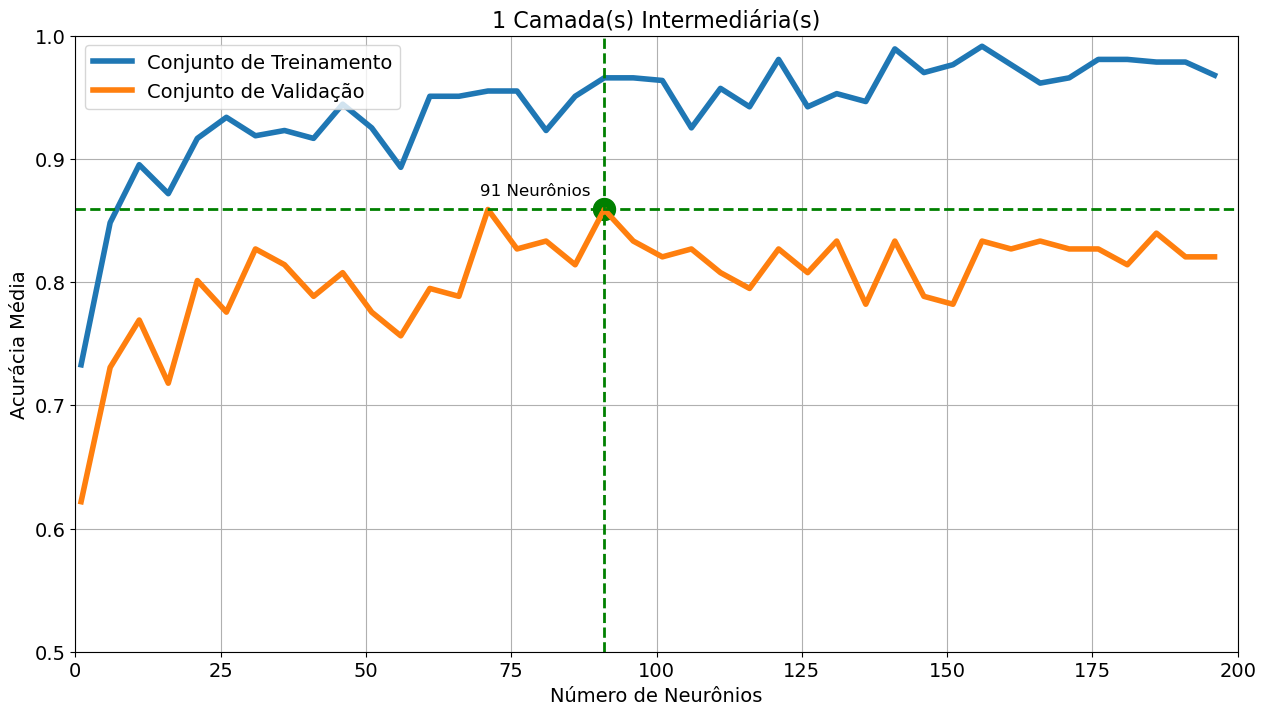

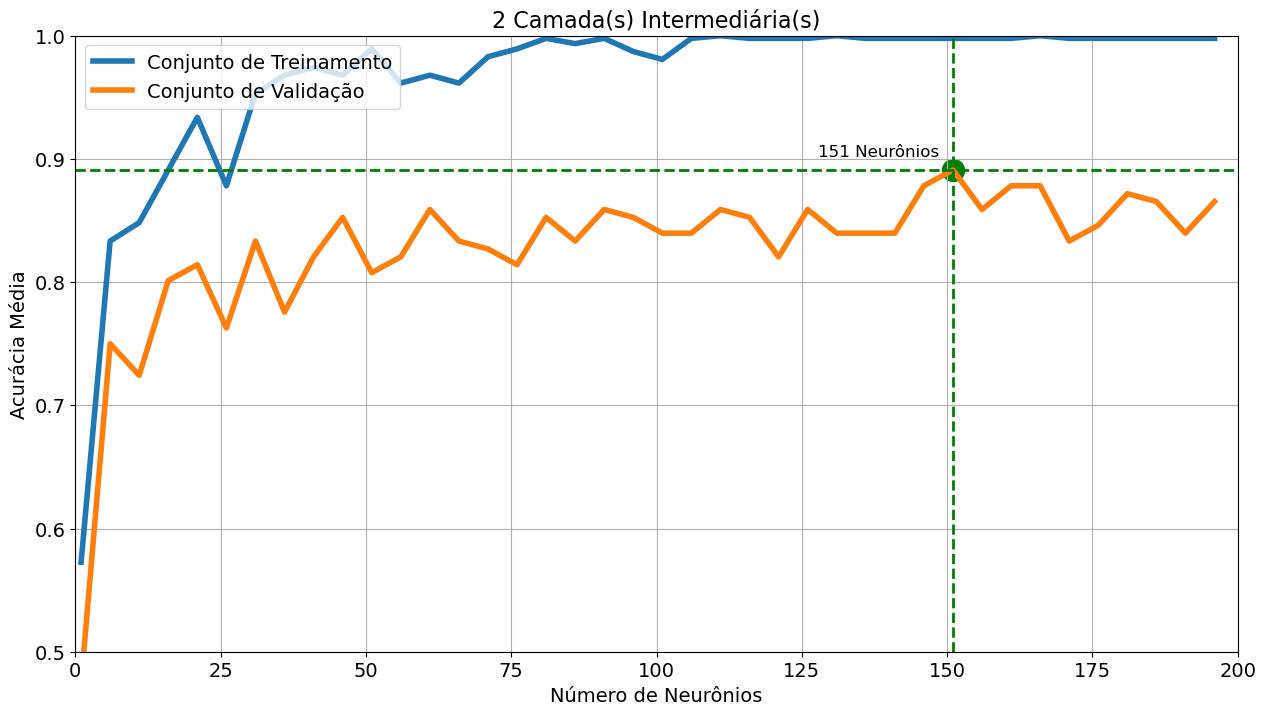

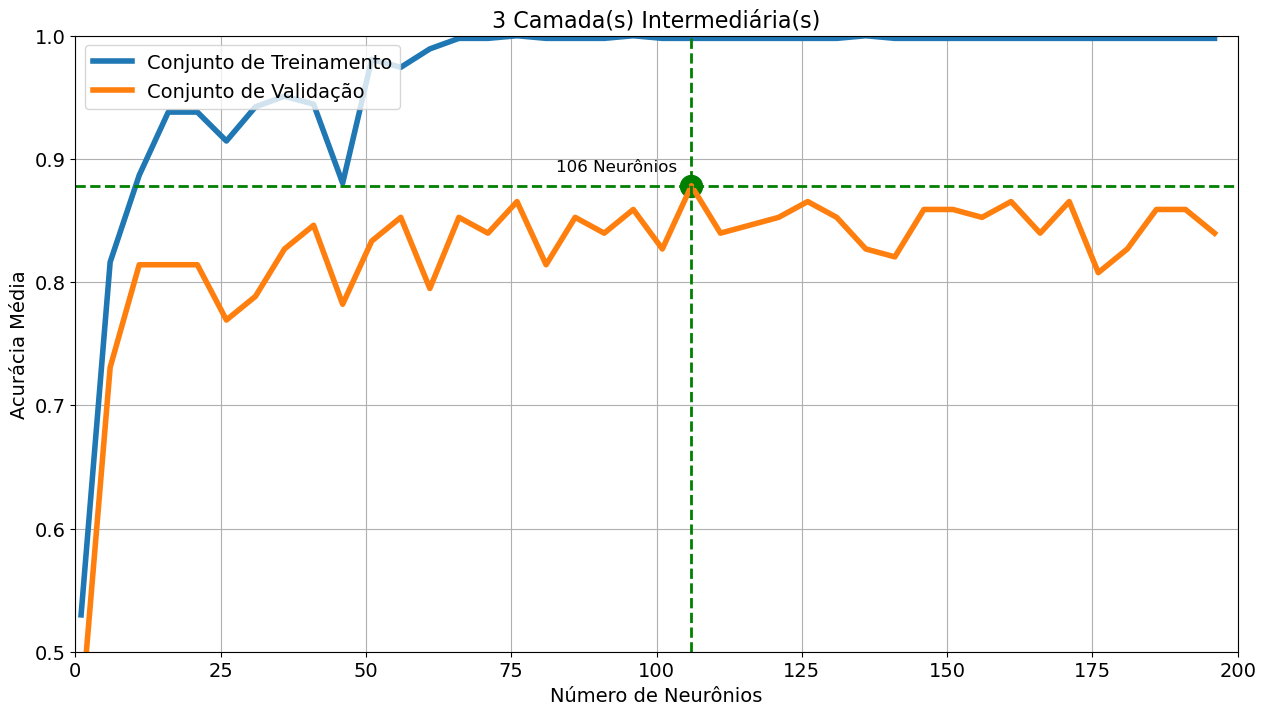

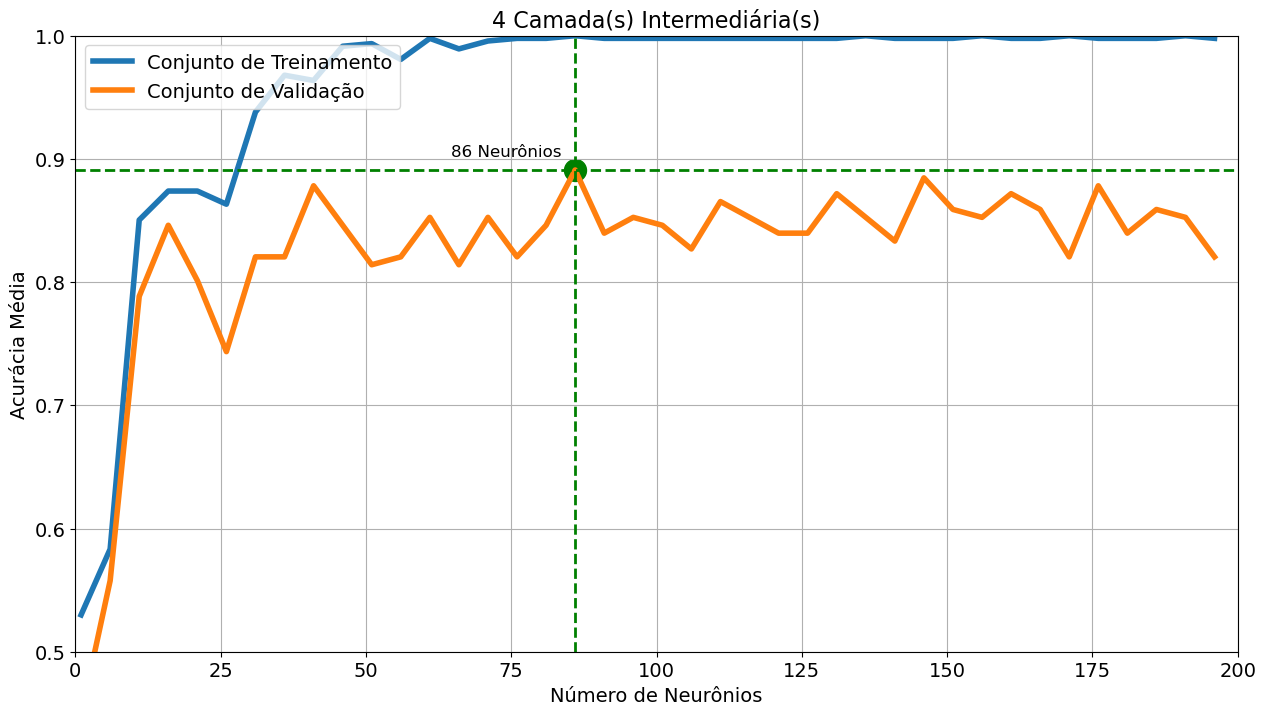

In [10]:
def CVM_plot (dic):

    for layer in dic.keys():
    
        
        list_acur_val = []
        list_acur_train =[]
        neurons=[]

        for neuron in dic[layer].keys():
        
            list_acur_val.append(dic[layer][neuron][0])
            list_acur_train.append(dic[layer][neuron][1])
            neurons.append(neuron)

        plt.figure(figsize=(15,8)) 
        
        plt.plot(neurons, list_acur_train, label = 'Conjunto de Treinamento', linewidth=4)
        plt.plot(neurons, list_acur_val, label = 'Conjunto de Validação', linewidth=4)
        plt.title(f'{layer} Camada(s) Intermediária(s)', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.axhline(max(list_acur_val), color='green', linestyle='dashed', linewidth=2)
        plt.axvline(neurons[np.argmax(list_acur_val)], color='green', linestyle='dashed', linewidth=2)
        plt.scatter(neurons[np.argmax(list_acur_val)], list_acur_val[np.argmax(list_acur_val)], 
                    s=250, color='green')
        plt.annotate('{:.0f} Neurônios'.format(neurons[np.argmax(list_acur_val)]), 
                    (neurons[np.argmax(list_acur_val)],list_acur_val[np.argmax(list_acur_val)]),
                    textcoords = 'offset points',
                        xytext=(-10,10),
                        ha='right', fontsize=12)

        plt.legend(fontsize=14, loc=2)
        plt.grid()
        plt.xlabel("Número de Neurônios", fontsize=14)
        plt.ylabel("Acurácia Média",fontsize=14)
        
        
        plt.xlim([0, (neurons[len(neurons)-1]//10)*10+10])
        plt.ylim([0.5, 1.0])

        plt.show()
        
CVM_plot(dic_metrics)

<font size=4.25>
    
<p style='text-align: justify;'>
No que diz respeito à função custo propriamente dita, foram levantadas os custos médio e mínimos por número de neurônio e camada intermediária da realização em que se obteve a maior acurácia junto ao conjunto de validação. Em outras palavras, a cada número de neurônio testado, eram levantados k (número de <em> folds </em> valores diferentes de acurácia e os custos associados à composição de treinamento atrelado a maior acurácia era guardados para o levantamento dos valores médios e mínimos. Dito isso, a Figura abaixo apresenta a evolução do custo médio e mínimo em função do número de neurônios e camadas intermediárias. 
</p>

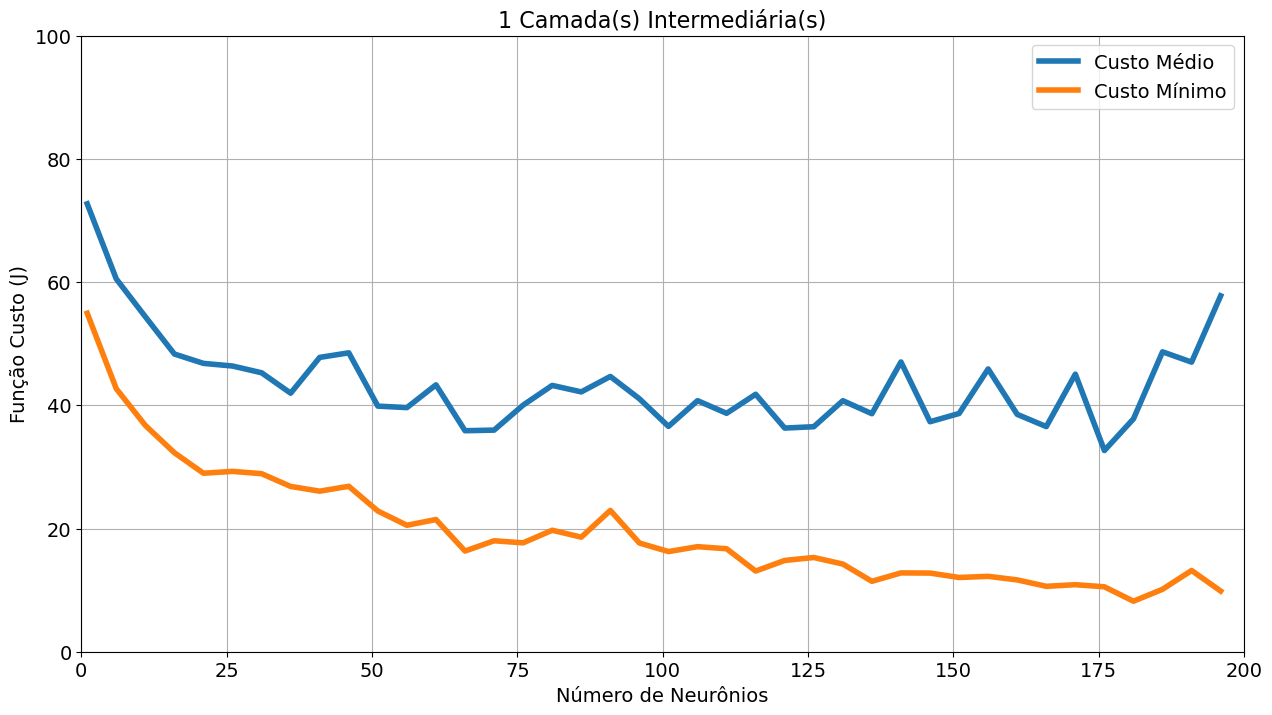

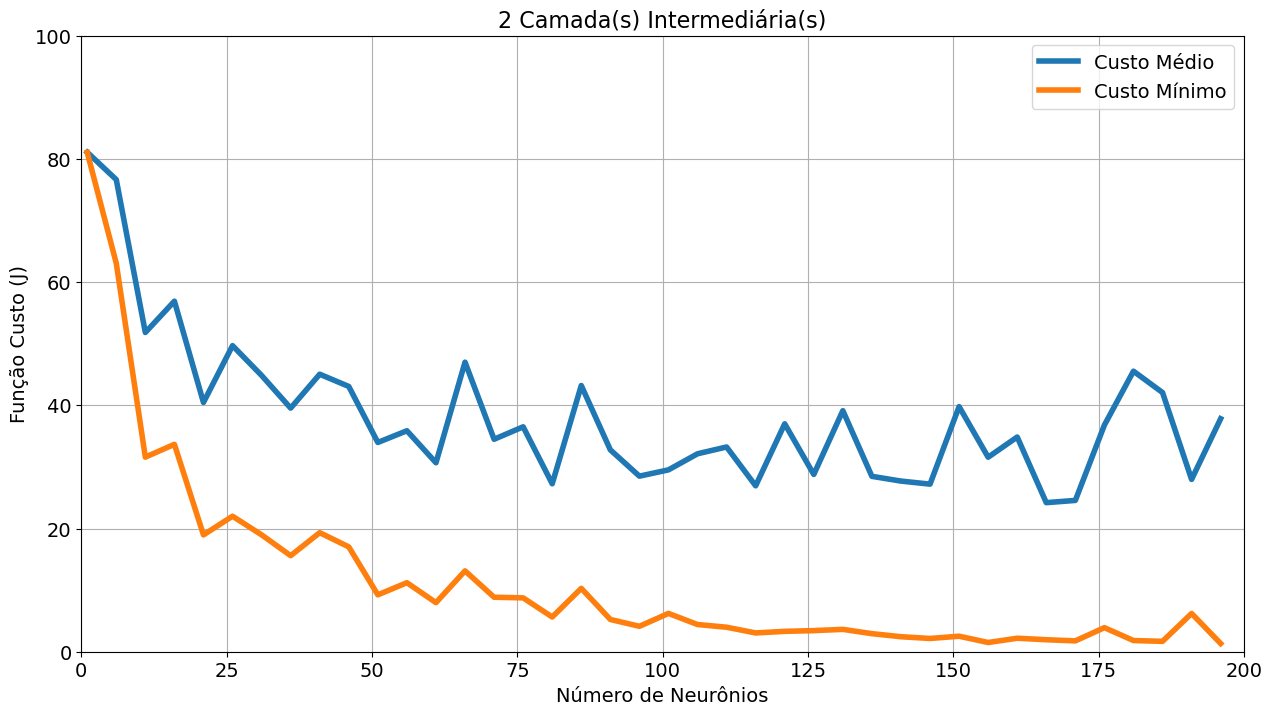

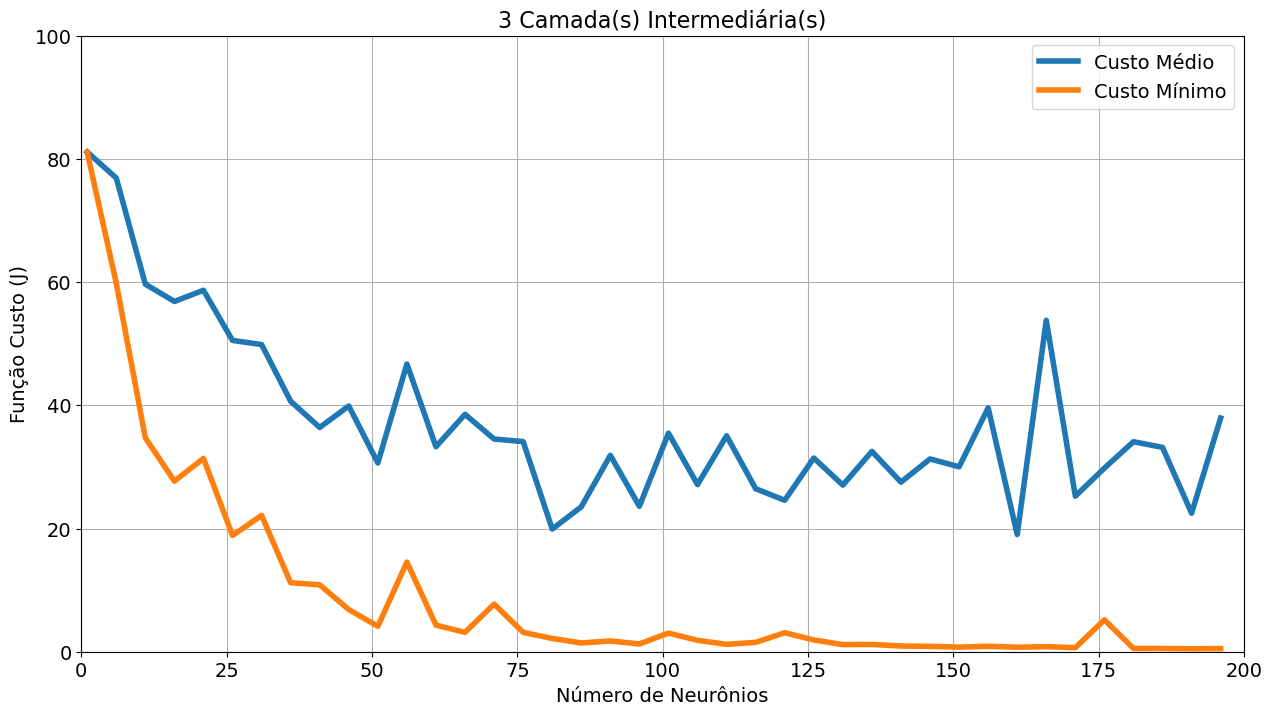

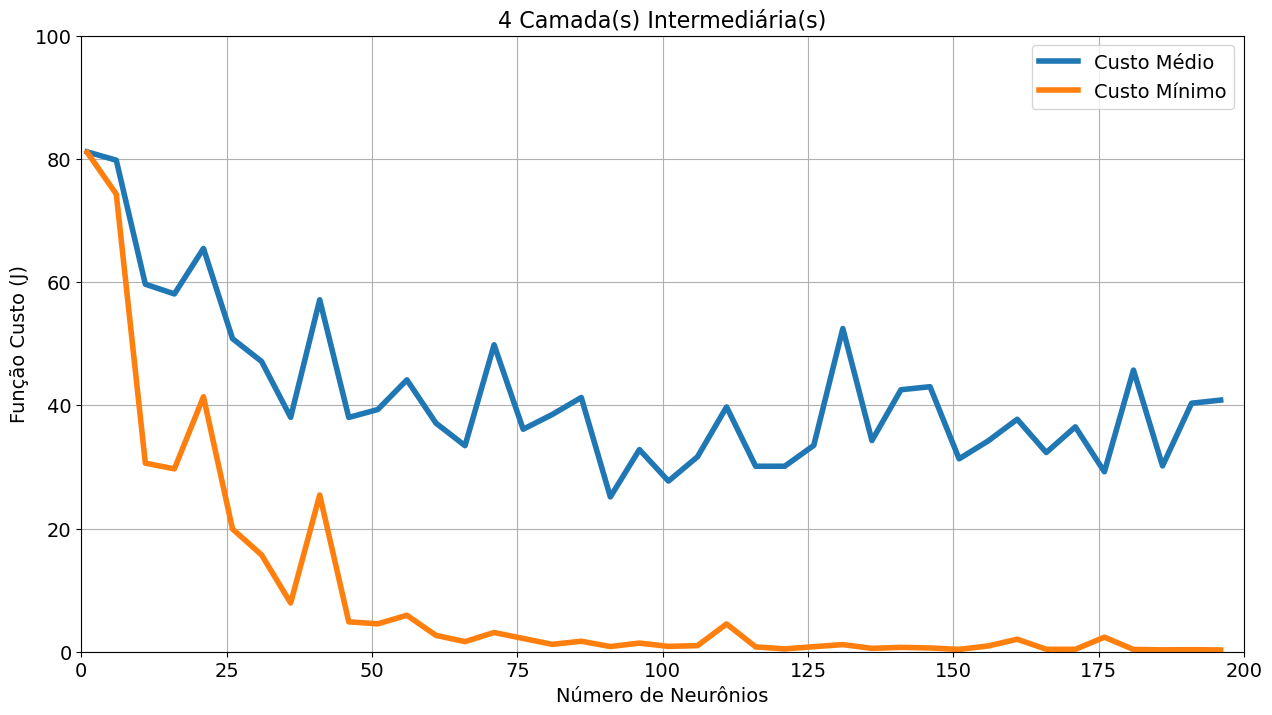

In [41]:
def J_plot (dic):

    for layer in dic.keys():
    
        list_mean_cost =[]
        list_min_cost=[]
        neurons=[]
    
        plt.figure(figsize=(15,8))

        for neuron in dic[layer].keys():

            list_mean_cost.append(np.mean(np.array(dic[layer][neuron][2])))
            list_min_cost.append(np.min(np.array(dic[layer][neuron][2])))
            neurons.append(neuron)

        plt.plot(neurons, list_mean_cost, label = 'Custo Médio', linewidth=4)
        plt.plot(neurons, list_min_cost, label= 'Custo Mínimo', linewidth=4)
        plt.title(f'{layer} Camada(s) Intermediária(s)', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
         
        plt.legend(fontsize=14)
        plt.grid()
        plt.xlabel("Número de Neurônios", fontsize=14)
        plt.ylabel("Função Custo (J)",fontsize=14)


        plt.xlim([0, (neurons[len(neurons)-1]//10)*10+10])
        plt.ylim([0, 100])

        plt.show()
        
J_plot(dic_metrics)

### Rede Neural - MLP | Teste

In [12]:
def max_value(test_dict):
    output = []
    for key in test_dict:
        max_key, max_value = max(test_dict[key].items(), key=lambda x: x[1])
        output.append([max_key, np.round(max_value[1],3),np.round(max_value[0],3)])
    
    max_value = 0
    
    for i in range(len(output)):
            
            value = output[i][2]
            
            if value > max_value:
                
                neuron = output[i][0]
                hidden_layer = i+1
                
                max_value=value
        
    return hidden_layer, neuron  


n_hidden_layers, n_neurons = max_value(dic_metrics)

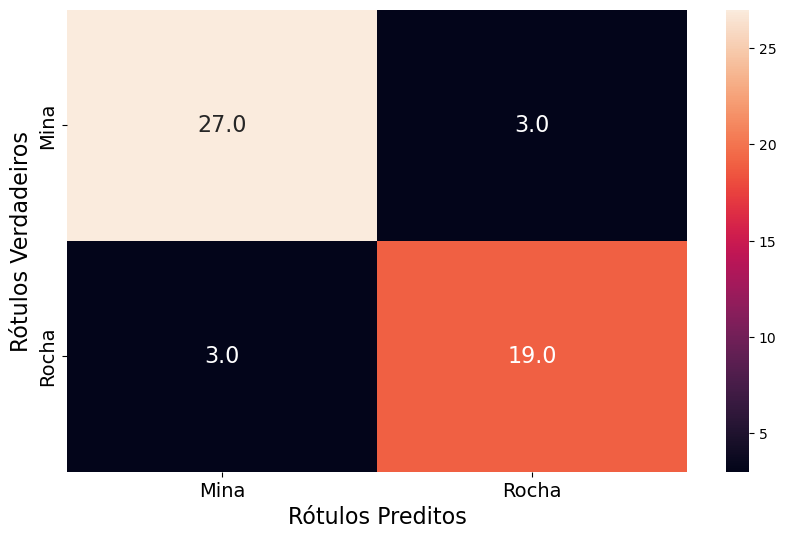

In [31]:
final_MLP_config = MLP_arch(X_train, n_hidden_layers*[n_neurons])
num_epochs = 100
mini_batch_size =12

train_indices = [i for i in range(len(X_train))]

learning_rate=0.025

weights, bias, cost_function = MLP_fit(X_train, Y_train, num_epochs, mini_batch_size,learning_rate,
                                                   final_MLP_config, train_indices, cost_function=[])


classes = prev_rot(weights, bias, X_teste) ; accur_teste = accur(classes, Y_teste)

fig, ax = plt.subplots(figsize=(10, 6))
cf_matrix = confusion_matrix(Y_teste,classes)
cf_matrix_fig=sns.heatmap(cf_matrix, annot=True,annot_kws={"size": 16}, fmt='.1f', ax=ax)
ax.set_xlabel('Rótulos Preditos', fontsize=16);ax.set_ylabel('Rótulos Verdadeiros', fontsize=16);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom , top)
ax.xaxis.set_ticklabels(['Mina', 'Rocha'], fontsize=14); ax.yaxis.set_ticklabels(['Mina', 'Rocha'], fontsize=14);


In [38]:
recall_score(classes, Y_teste),precision_score(classes, Y_teste), f1_score(classes, Y_teste)

(0.8636363636363636, 0.8636363636363636, 0.8636363636363636)